**Classification with Python**

> In this notebook we try to practice all the classification algorithms
> that we learned in this course.
>
> We load a dataset using Pandas library, and apply the following
> algorithms, and find the best one for this specific dataset by
> accuracy evaluation methods.
>
> Lets first load required libraries:
>
> In \[1\]: **import** itertools  
> **import** numpy **as** np  
> **import** matplotlib.pyplot **as** plt  
> **from** matplotlib.ticker **import** NullFormatter  
> **import** pandas **as** pd  
> **import** numpy **as** np  
> **import** matplotlib.ticker **as** ticker  
> **from** sklearn **import** preprocessing  
> **%matplotlib** inline
>
> **About dataset**
>
> This dataset is about past loans. The **Loan_train.csv** data set
> includes details of 346 customers whose loan are already paid off or
> defaulted. It includes following fields:

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p><strong>Field</strong><br />
Loan_status Principal</p>
<p>Terms</p>
</blockquote></th>
<th><blockquote>
<p><strong>Description</strong><br />
Whether a loan is paid off on in collection<br />
Basic principal loan amount at the<br />
Origination terms which can be weekly (7 days), biweekly, and monthly
payoff schedule</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Effective_date When the loan got originated and took effects
>
> Due_date Since it’s one-time payoff schedule, each loan has one single
> due date
>
> Age Age of applicant
>
> Education Education of applicant
>
> Gender The gender of applicant
>
> Lets download the dataset
>
> **!**wget -O loan_train.csv https://s3-api.us-  
> geo.objectstorage.softlayer.net/cf-courses-  
> data/CognitiveClass/ML0101ENv3/labs/loan_train.csv  
> --2019-06-02 16:47:01--
> https://s3-api.us-geo.objectstorage.softlayer.net/
> cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
>
> Resolving s3-api.us-geo.objectstorage.softlayer.net
> (s3-api.us-geo.objectst orage.softlayer.net)... 67.228.254.193  
> Connecting to s3-api.us-geo.objectstorage.softlayer.net
> (s3-api.us-geo.obje ctstorage.softlayer.net)\|67.228.254.193\|:443...
> connected.
>
> HTTP request sent, awaiting response... 200 OK Length: 23101 (23K)
> \[text/csv\]  
> Saving to: ‘loan_train.csv’
>
> 100%\[======================================\>\] 23,101 --.-K/s in
> 0.07 s
>
> 2019-06-02 16:47:02 (302 KB/s) - ‘loan_train.csv’ saved
> \[23101/23101\]
>
> **Load Data From CSV File**
>
> In \[3\]: df **=** pd**.**read_csv('loan_train.csv')  
> df**.**head()

Out\[3\]:

<table>
<colgroup>
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="2"><strong>0</strong></th>
<th><blockquote>
<p><strong>Unna med: 0</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Unna med:</strong> <strong>0.1</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>loan_st</strong> <strong>atus</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Princi</strong> <strong>pal</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>ter</strong><br />
<strong>ms</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>effective</strong> <strong>_date</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>due_d</strong> <strong>ate</strong></p>
</blockquote></th>
<th><strong>a</strong><br />
<strong>ge</strong></th>
<th><blockquote>
<p><strong>educa</strong> <strong>tion</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Gen</strong><br />
<strong>der</strong></p>
</blockquote></th>
</tr>
<tr class="odd">
<th>0</th>
<th>0</th>
<th><blockquote>
<p>PAIDO FF</p>
</blockquote></th>
<th>1000</th>
<th>30</th>
<th>9/8/2016</th>
<th><blockquote>
<p>10/7/2 016</p>
</blockquote></th>
<th><blockquote>
<p>4<br />
5</p>
</blockquote></th>
<th>High<br />
School or<br />
Below</th>
<th><blockquote>
<p>male</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><strong>1</strong></td>
<td>2</td>
<td>2</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>30</td>
<td>9/8/2016</td>
<td><blockquote>
<p>10/7/2 016</p>
</blockquote></td>
<td><blockquote>
<p>3<br />
3</p>
</blockquote></td>
<td><blockquote>
<p>Bechal or</p>
</blockquote></td>
<td><blockquote>
<p>fema<br />
le</p>
</blockquote></td>
</tr>
<tr class="even">
<td><strong>2</strong></td>
<td>3</td>
<td>3</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>15</td>
<td>9/8/2016</td>
<td><blockquote>
<p>9/22/2 016</p>
</blockquote></td>
<td><blockquote>
<p>2<br />
7</p>
</blockquote></td>
<td><blockquote>
<p>colleg e</p>
</blockquote></td>
<td><blockquote>
<p>male</p>
</blockquote></td>
</tr>
<tr class="odd">
<td><strong>3</strong></td>
<td>4</td>
<td>4</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>30</td>
<td>9/9/2016</td>
<td><blockquote>
<p>10/8/2 016</p>
</blockquote></td>
<td><blockquote>
<p>2<br />
8</p>
</blockquote></td>
<td><blockquote>
<p>colleg e</p>
</blockquote></td>
<td><blockquote>
<p>fema<br />
le</p>
</blockquote></td>
</tr>
<tr class="even">
<td><strong>4</strong></td>
<td>6</td>
<td>6</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>30</td>
<td>9/9/2016</td>
<td><blockquote>
<p>10/8/2 016</p>
</blockquote></td>
<td><blockquote>
<p>2<br />
9</p>
</blockquote></td>
<td><blockquote>
<p>colleg e</p>
</blockquote></td>
<td><blockquote>
<p>male</p>
</blockquote></td>
</tr>
</tbody>
</table>

> In \[4\]: df**.**shape
>
> Out\[4\]: (346, 10)
>
> **Convert to date time object**
>
> In \[5\]: df\['due_date'\] **=**
> pd**.**to_datetime(df\['due_date'\])  
> df\['effective_date'\] **=**
> pd**.**to_datetime(df\['effective_date'\])  
> df**.**head()

Out\[5\]:

<table>
<colgroup>
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
<col style="width: 9%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="2"><strong>0</strong></th>
<th><blockquote>
<p><strong>Unna med: 0</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Unna med:</strong> <strong>0.1</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>loan_st</strong> <strong>atus</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Princi</strong> <strong>pal</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>ter</strong><br />
<strong>ms</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>effective</strong> <strong>_date</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>due_d</strong> <strong>ate</strong></p>
</blockquote></th>
<th><strong>a</strong><br />
<strong>ge</strong></th>
<th><blockquote>
<p><strong>educa</strong> <strong>tion</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Gen</strong><br />
<strong>der</strong></p>
</blockquote></th>
</tr>
<tr class="odd">
<th>0</th>
<th>0</th>
<th><blockquote>
<p>PAIDO FF</p>
</blockquote></th>
<th>1000</th>
<th>30</th>
<th><blockquote>
<p>2016-09- 08</p>
</blockquote></th>
<th><blockquote>
<p>2016-<br />
10-07</p>
</blockquote></th>
<th><blockquote>
<p>4<br />
5</p>
</blockquote></th>
<th>High<br />
School or<br />
Below</th>
<th><blockquote>
<p>male</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><strong>1</strong></td>
<td>2</td>
<td>2</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>30</td>
<td><blockquote>
<p>2016-09- 08</p>
</blockquote></td>
<td><blockquote>
<p>2016-<br />
10-07</p>
</blockquote></td>
<td><blockquote>
<p>3<br />
3</p>
</blockquote></td>
<td><blockquote>
<p>Bechal or</p>
</blockquote></td>
<td><blockquote>
<p>fema<br />
le</p>
</blockquote></td>
</tr>
<tr class="even">
<td><strong>2</strong></td>
<td>3</td>
<td>3</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>15</td>
<td><blockquote>
<p>2016-09- 08</p>
</blockquote></td>
<td><blockquote>
<p>2016-<br />
09-22</p>
</blockquote></td>
<td><blockquote>
<p>2<br />
7</p>
</blockquote></td>
<td><blockquote>
<p>colleg e</p>
</blockquote></td>
<td><blockquote>
<p>male</p>
</blockquote></td>
</tr>
<tr class="odd">
<td><strong>3</strong></td>
<td>4</td>
<td>4</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>30</td>
<td><blockquote>
<p>2016-09- 09</p>
</blockquote></td>
<td><blockquote>
<p>2016-<br />
10-08</p>
</blockquote></td>
<td><blockquote>
<p>2<br />
8</p>
</blockquote></td>
<td><blockquote>
<p>colleg e</p>
</blockquote></td>
<td><blockquote>
<p>fema<br />
le</p>
</blockquote></td>
</tr>
<tr class="even">
<td><strong>4</strong></td>
<td>6</td>
<td>6</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>30</td>
<td><blockquote>
<p>2016-09- 09</p>
</blockquote></td>
<td><blockquote>
<p>2016-<br />
10-08</p>
</blockquote></td>
<td><blockquote>
<p>2<br />
9</p>
</blockquote></td>
<td><blockquote>
<p>colleg e</p>
</blockquote></td>
<td><blockquote>
<p>male</p>
</blockquote></td>
</tr>
</tbody>
</table>

> **Data visualization and pre-processing**
>
> Let’s see how many of each class is in our data set
>
> In \[6\]: df\['loan_status'\]**.**value_counts()
>
> Out\[6\]: PAIDOFF 260  
> COLLECTION 86  
> Name: loan_status, dtype: int64  
> 260 people have paid off the loan on time while 86 have gone into
> collection
>
> Lets plot some columns to underestand data better:
>
> In \[7\]: *\# notice: installing seaborn might takes a few minutes*  
> **!**conda install -c anaconda seaborn -y
>
> Solving environment: done
>
> \# All requested packages already installed.
>
> In \[8\]: **import** seaborn **as** sns
>
> bins **=** np**.**linspace(df**.**Principal**.**min(),
> df**.**Principal**.**max(), 10)  
> g **=** sns**.**FacetGrid(df, col**=**"Gender", hue**=**"loan_status",
> palette**=**"Set1", col_wrap**=**2)  
> g**.**map(plt**.**hist, 'Principal', bins**=**bins, ec**=**"k")
>
> g**.**axes\[**-**1\]**.**legend()  
> plt**.**show()

| 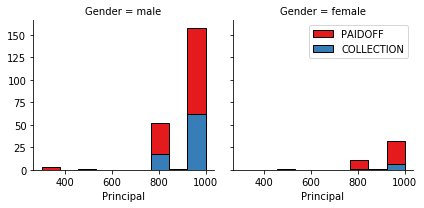                                  | In \[9\]: |
|------------------------------------|------------------------------------|

> bins **=** np**.**linspace(df**.**age**.**min(), df**.**age**.**max(),
> 10)  
> g **=** sns**.**FacetGrid(df, col**=**"Gender", hue**=**"loan_status",
> palette**=**"Set1", col_wrap**=**2)  
> g**.**map(plt**.**hist, 'age', bins**=**bins, ec**=**"k")
>
> g**.**axes\[**-**1\]**.**legend()  
> plt**.**show()
>
> <img
> src="attachment:vertopal_272e8ff9ac45473a901e6c72a512fd54/media/image2.png"
> style="width:5.89167in;height:2.89167in" />
>
> **Pre-processing: Feature selection/extraction**
>
> **Lets look at the day of the week people get the loan**

In \[10\]:

> df\['dayofweek'\] **=** df\['effective_date'\]**.**dt**.**dayofweek  
> bins **=** np**.**linspace(df**.**dayofweek**.**min(),
> df**.**dayofweek**.**max(), 10)  
> g **=** sns**.**FacetGrid(df, col**=**"Gender", hue**=**"loan_status",
> palette**=**"Set1", col_wrap**=**2)  
> g**.**map(plt**.**hist, 'dayofweek', bins**=**bins, ec**=**"k")  
> g**.**axes\[**-**1\]**.**legend()  
> plt**.**show()
>
> <img
> src="attachment:vertopal_272e8ff9ac45473a901e6c72a512fd54/media/image3.png"
> style="width:5.89167in;height:2.89167in" />
>
> We see that people who get the loan at the end of the week dont pay it
> off, so lets use Feature binarization to set a threshold values less
> then day 4

In \[11\]:

> df\['weekend'\] **=** df\['dayofweek'\]**.**apply(**lambda** x: 1
> **if** (x**\>**3) **else** 0)

<table>
<colgroup>
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
</colgroup>
<thead>
<tr class="header">
<th>df<strong>.</strong>head()</th>
<th rowspan="2"><blockquote>
<p><strong>Unna</strong></p>
</blockquote></th>
<th rowspan="3"><strong>loan_s</strong></th>
<th rowspan="3"><strong>Prin</strong></th>
<th rowspan="3"><strong>ter</strong></th>
<th rowspan="3"><strong>effectiv</strong></th>
<th rowspan="3"><strong>due_</strong></th>
<th rowspan="2"><strong>a</strong></th>
<th rowspan="3"><strong>educ</strong></th>
<th rowspan="3"><strong>Gen</strong></th>
<th rowspan="3"><strong>dayof</strong></th>
<th>Out[11]:</th>
</tr>
<tr class="odd">
<th><strong>Unna</strong></th>
<th rowspan="2"><strong>wee</strong></th>
</tr>
<tr class="header">
<th rowspan="2"><strong>med:</strong></th>
<th rowspan="2"><strong>med:</strong></th>
<th rowspan="2"><strong>g</strong></th>
</tr>
<tr class="odd">
<th rowspan="2"><strong>tatus</strong></th>
<th rowspan="2"><strong>cipal</strong></th>
<th rowspan="2"><strong>ms</strong></th>
<th rowspan="2"><strong>e_date</strong></th>
<th rowspan="2"><strong>date</strong></th>
<th rowspan="2"><strong>ation</strong></th>
<th rowspan="2"><strong>der</strong></th>
<th rowspan="2"><blockquote>
<p><strong>week</strong></p>
</blockquote></th>
<th rowspan="2"><blockquote>
<p><strong>kend</strong></p>
</blockquote></th>
</tr>
<tr class="header">
<th><strong>0</strong></th>
<th><strong>0.1</strong></th>
<th><strong>e</strong></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

High

<table style="width:100%;">
<colgroup>
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="4"><blockquote>
<p><strong>0</strong></p>
</blockquote></th>
<th rowspan="4">0</th>
<th rowspan="4">0</th>
<th rowspan="2">PAIDO</th>
<th rowspan="4">1000</th>
<th rowspan="4">30</th>
<th rowspan="2">2016-</th>
<th>2016</th>
<th rowspan="2">4</th>
<th>Scho</th>
<th rowspan="2"><blockquote>
<p>mal</p>
</blockquote></th>
<th rowspan="4">3</th>
<th rowspan="4">0</th>
</tr>
<tr class="odd">
<th rowspan="2">-10-</th>
<th rowspan="2">ol or</th>
</tr>
<tr class="header">
<th rowspan="2">FF</th>
<th rowspan="2"><blockquote>
<p>09-08</p>
</blockquote></th>
<th rowspan="2">5</th>
<th rowspan="2">e</th>
</tr>
<tr class="odd">
<th>07</th>
<th>Belo</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

w

| **1** | **Unna** | **Unna** | **loan_s** | **Prin**  | **ter** | **effectiv** | **due\_** | **a** | **educ**  | **Gen** | **dayof** | **wee**  |
|------|------|------|------|------|------|------|------|------|------|------|------|------|
|       | **med:** | **med:** |            |           |         |              |           | **g** |           |         |           |          |
|       |          |          | **tatus**  | **cipal** | **ms**  | **e_date**   | **date**  |       | **ation** | **der** | **week**  | **kend** |
|       | **0**    | **0.1**  |            |           |         |              |           | **e** |           |         |           |          |
|       | 2        | 2        | PAIDO      | 1000      | 30      | 2016-        | 2016      | 3     | Bech      | fem     | 3         | 0        |
|       |          |          |            |           |         |              | -10-      |       |           |         |           |          |
|       |          |          | FF         |           |         | 09-08        |           | 3     | alor      | ale     |           |          |
|       |          |          |            |           |         |              | 07        |       |           |         |           |          |
| **2** | 3        | 3        | PAIDO      | 1000      | 15      | 2016-        | 2016      | 2     | colle     | mal     | 3         | 0        |
|       |          |          |            |           |         |              | -09-      |       |           |         |           |          |
|       |          |          | FF         |           |         | 09-08        |           | 7     | ge        | e       |           |          |
|       |          |          |            |           |         |              | 22        |       |           |         |           |          |
| **3** | 4        | 4        | PAIDO      | 1000      | 30      | 2016-        | 2016      | 2     | colle     | fem     | 4         | 1        |
|       |          |          |            |           |         |              | -10-      |       |           |         |           |          |
|       |          |          | FF         |           |         | 09-09        |           | 8     | ge        | ale     |           |          |
|       |          |          |            |           |         |              | 08        |       |           |         |           |          |
| **4** | 6        | 6        | PAIDO      | 1000      | 30      | 2016-        | 2016      | 2     | colle     | mal     | 4         | 1        |
|       |          |          |            |           |         |              | -10-      |       |           |         |           |          |
|       |          |          | FF         |           |         | 09-09        |           | 9     | ge        | e       |           |          |
|       |          |          |            |           |         |              | 08        |       |           |         |           |          |

> Convert Categorical features to numerical values Lets look at gender:

In \[12\]:

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>df<strong>.</strong>groupby(['Gender'])['loan_status']<strong>.</strong>value_counts(normalize<strong>=True</strong>)</p>
</blockquote></th>
<th><blockquote>
<p>Out[12]:</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Gender loan_status  
> female PAIDOFF 0.865385  
> COLLECTION 0.134615  
> male PAIDOFF 0.731293  
> COLLECTION 0.268707  
> Name: loan_status, dtype: float64  
> 86 % of female pay there loans while only 73 % of males pay there loan
>
> Lets convert male to 0 and female to 1:

In \[13\]:

> df\['Gender'\]**.**replace(to_replace**=**\['male','female'\],
> value**=**\[0,1\],inplace**=True**)

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>df<strong>.</strong>head()</p>
</blockquote></th>
<th>Out[13]:</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

| **Unna** | **Unna** | **loan_s** | **Prin**  | **ter** | **effectiv** | **due\_** | **a** | **educ**  | **Gen** | **dayof** | **wee**  |
|------|------|------|------|------|------|------|------|------|------|------|------|
| **med:** | **med:** |            |           |         |              |           | **g** |           |         |           |          |
|          |          | **tatus**  | **cipal** | **ms**  | **e_date**   | **date**  |       | **ation** | **der** | **week**  | **kend** |
| **0**    | **0.1**  |            |           |         |              |           | **e** |           |         |           |          |

High

<table style="width:100%;">
<colgroup>
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="4"><blockquote>
<p><strong>0</strong></p>
</blockquote></th>
<th rowspan="4">0</th>
<th rowspan="4">0</th>
<th rowspan="2">PAIDO</th>
<th rowspan="4">1000</th>
<th rowspan="4">30</th>
<th rowspan="2">2016-</th>
<th>2016</th>
<th rowspan="2">4</th>
<th><blockquote>
<p>Scho</p>
</blockquote></th>
<th rowspan="4">0</th>
<th rowspan="4">3</th>
<th rowspan="4">0</th>
</tr>
<tr class="odd">
<th rowspan="2">-10-</th>
<th rowspan="2">ol or</th>
</tr>
<tr class="header">
<th rowspan="2">FF</th>
<th rowspan="2"><blockquote>
<p>09-08</p>
</blockquote></th>
<th rowspan="2">5</th>
</tr>
<tr class="odd">
<th>07</th>
<th><blockquote>
<p>Belo</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

w

<table style="width:100%;">
<colgroup>
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
<col style="width: 7%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="4"><blockquote>
<p><strong>1</strong></p>
</blockquote></th>
<th rowspan="4">2</th>
<th rowspan="4">2</th>
<th rowspan="2">PAIDO</th>
<th rowspan="4">1000</th>
<th rowspan="4">30</th>
<th rowspan="2">2016-</th>
<th>2016</th>
<th rowspan="2">3</th>
<th rowspan="2"><blockquote>
<p>Bech</p>
</blockquote></th>
<th rowspan="4">1</th>
<th rowspan="4">3</th>
<th rowspan="4">0</th>
</tr>
<tr class="odd">
<th rowspan="2">-10-</th>
</tr>
<tr class="header">
<th rowspan="2">FF</th>
<th rowspan="2"><blockquote>
<p>09-08</p>
</blockquote></th>
<th rowspan="2">3</th>
<th rowspan="2">alor</th>
</tr>
<tr class="odd">
<th>07</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td rowspan="4"><blockquote>
<p><strong>2</strong></p>
</blockquote></td>
<td rowspan="4">3</td>
<td rowspan="4">3</td>
<td rowspan="2">PAIDO</td>
<td rowspan="4">1000</td>
<td rowspan="4">15</td>
<td rowspan="2">2016-</td>
<td>2016</td>
<td rowspan="2">2</td>
<td rowspan="2"><blockquote>
<p>colle</p>
</blockquote></td>
<td rowspan="4">0</td>
<td rowspan="4">3</td>
<td rowspan="4">0</td>
</tr>
<tr class="even">
<td rowspan="2">-09-</td>
</tr>
<tr class="odd">
<td rowspan="2">FF</td>
<td rowspan="2"><blockquote>
<p>09-08</p>
</blockquote></td>
<td rowspan="2">7</td>
<td rowspan="2">ge</td>
</tr>
<tr class="even">
<td>22</td>
</tr>
<tr class="odd">
<td rowspan="4"><blockquote>
<p><strong>3</strong></p>
</blockquote></td>
<td rowspan="4">4</td>
<td rowspan="4">4</td>
<td rowspan="2">PAIDO</td>
<td rowspan="4">1000</td>
<td rowspan="4">30</td>
<td rowspan="2">2016-</td>
<td>2016</td>
<td rowspan="2">2</td>
<td rowspan="2"><blockquote>
<p>colle</p>
</blockquote></td>
<td rowspan="4">1</td>
<td rowspan="4">4</td>
<td rowspan="4">1</td>
</tr>
<tr class="even">
<td rowspan="2">-10-</td>
</tr>
<tr class="odd">
<td rowspan="2">FF</td>
<td rowspan="2"><blockquote>
<p>09-09</p>
</blockquote></td>
<td rowspan="2">8</td>
<td rowspan="2">ge</td>
</tr>
<tr class="even">
<td>08</td>
</tr>
<tr class="odd">
<td rowspan="4"><blockquote>
<p><strong>4</strong></p>
</blockquote></td>
<td rowspan="4">6</td>
<td rowspan="4">6</td>
<td rowspan="2">PAIDO</td>
<td rowspan="4">1000</td>
<td rowspan="4">30</td>
<td rowspan="2">2016-</td>
<td>2016</td>
<td rowspan="2">2</td>
<td rowspan="2"><blockquote>
<p>colle</p>
</blockquote></td>
<td rowspan="4">0</td>
<td rowspan="4">4</td>
<td rowspan="4">1</td>
</tr>
<tr class="even">
<td rowspan="2">-10-</td>
</tr>
<tr class="odd">
<td rowspan="2">FF</td>
<td rowspan="2"><blockquote>
<p>09-09</p>
</blockquote></td>
<td rowspan="2">9</td>
<td rowspan="2">ge</td>
</tr>
<tr class="even">
<td>08</td>
</tr>
</tbody>
</table>

> One Hot Encoding
>
> *How about education?*  
> In \[14\]:
>
> df**.**groupby(\['education'\])\['loan_status'\]**.**value_counts(normalize**=True**)
> Out\[14\]:
>
> education loan_status  
> Bechalor PAIDOFF 0.750000 COLLECTION 0.250000 High School or Below
> PAIDOFF 0.741722 COLLECTION 0.258278 Master or Above COLLECTION
> 0.500000 PAIDOFF 0.500000 college PAIDOFF 0.765101 COLLECTION 0.234899
> Name: loan_status, dtype: float64
>
> *Feature befor One Hot Encoding*  
> In \[15\]:

<table style="width:100%;">
<colgroup>
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="6"><blockquote>
<p>df[['Principal','terms','age','Gender','education']]<strong>.</strong>head()</p>
</blockquote></th>
<th rowspan="7">Out[15]:</th>
</tr>
<tr class="odd">
<th colspan="2"><strong>Principal</strong></th>
<th><strong>terms</strong></th>
<th><strong>age</strong></th>
<th><strong>Gender</strong></th>
<th><strong>education</strong></th>
</tr>
<tr class="header">
<th><strong>0</strong></th>
<th>1000</th>
<th>30</th>
<th>45</th>
<th>0</th>
<th><blockquote>
<p>High School or Below</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><strong>1</strong></th>
<th>1000</th>
<th>30</th>
<th>33</th>
<th>1</th>
<th>Bechalor</th>
</tr>
<tr class="header">
<th><strong>2</strong></th>
<th>1000</th>
<th>15</th>
<th>27</th>
<th>0</th>
<th>college</th>
</tr>
<tr class="odd">
<th><strong>3</strong></th>
<th>1000</th>
<th>30</th>
<th>28</th>
<th>1</th>
<th>college</th>
</tr>
<tr class="header">
<th><strong>4</strong></th>
<th>1000</th>
<th>30</th>
<th>29</th>
<th>0</th>
<th>college</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> *Use one hot encoding technique to conver categorical varables to
> binary variables and append them to the feature Data Frame*  
> In \[16\]:
>
> Feature **=** df\[\['Principal','terms','age','Gender','weekend'\]\]  
> Feature **=**
> pd**.**concat(\[Feature,pd**.**get_dummies(df\['education'\])\],
> axis**=**1) Feature**.**drop(\['Master or Above'\], axis **=**
> 1,inplace**=True**)

<table>
<colgroup>
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="3"><blockquote>
<p>Feature<strong>.</strong>head()</p>
</blockquote></th>
<th rowspan="2"><strong>age</strong></th>
<th rowspan="2"><strong>Gender</strong></th>
<th rowspan="2"><strong>weekend</strong></th>
<th rowspan="2"><strong>Bechalor</strong></th>
<th rowspan="2"><strong>High School or Below</strong></th>
<th>Out[16]:</th>
</tr>
<tr class="odd">
<th colspan="2"><strong>Principal</strong></th>
<th><strong>terms</strong></th>
<th><blockquote>
<p><strong>college</strong></p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><strong>0</strong></td>
<td>1000</td>
<td>30</td>
<td>45</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr class="even">
<td><strong>1</strong></td>
<td>1000</td>
<td>30</td>
<td>33</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr class="odd">
<td><strong>2</strong></td>
<td>1000</td>
<td>15</td>
<td>27</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr class="even">
<td><strong>3</strong></td>
<td>1000</td>
<td>30</td>
<td>28</td>
<td>1</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr class="odd">
<td><strong>4</strong></td>
<td>1000</td>
<td>30</td>
<td>29</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
</tbody>
</table>

> **Feature selection**
>
> Lets defind feature sets, X:

In \[17\]:

> X **=** Feature

<table>
<colgroup>
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="2"><blockquote>
<p>X[0:5]</p>
</blockquote></th>
<th rowspan="2"><strong>terms</strong></th>
<th rowspan="2"><strong>age</strong></th>
<th rowspan="2"><strong>Gender</strong></th>
<th rowspan="2"><strong>weekend</strong></th>
<th rowspan="2"><strong>Bechalor</strong></th>
<th rowspan="2"><strong>High School or Below</strong></th>
<th>Out[17]:</th>
</tr>
<tr class="odd">
<th colspan="2"><strong>Principal</strong></th>
<th><blockquote>
<p><strong>college</strong></p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><strong>0</strong></td>
<td>1000</td>
<td>30</td>
<td>45</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr class="even">
<td><strong>1</strong></td>
<td>1000</td>
<td>30</td>
<td>33</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr class="odd">
<td><strong>2</strong></td>
<td>1000</td>
<td>15</td>
<td>27</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr class="even">
<td><strong>3</strong></td>
<td>1000</td>
<td>30</td>
<td>28</td>
<td>1</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr class="odd">
<td><strong>4</strong></td>
<td>1000</td>
<td>30</td>
<td>29</td>
<td>0</td>
<td>1</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
</tbody>
</table>

> What are our lables?

In \[18\]:

> y **=** df\['loan_status'\]**.**values

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>y[0:5]</p>
</blockquote></th>
<th>Out[18]:</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> array(\['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'\],
> dtype=object )
>
> Normalize Data  
> Data Standardization give data zero mean and unit variance
> (technically should be done after train test split )

In \[19\]:

> X**=** preprocessing**.**StandardScaler()**.**fit(X)**.**transform(X)

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>X[0:5]</p>
</blockquote></th>
<th>Out[19]:</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> array(\[\[ 0.51578458, 0.92071769, 2.33152555, -0.42056004,
> -1.20577805, -0.38170062, 1.13639374, -0.86968108\],  
> \[ 0.51578458, 0.92071769, 0.34170148, 2.37778177, -1.20577805,
> 2.61985426, -0.87997669, -0.86968108\],  
> \[ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
> -0.38170062, -0.87997669, 1.14984679\],  
> \[ 0.51578458, 0.92071769, -0.48739188, 2.37778177, 0.82934003,
> -0.38170062, -0.87997669, 1.14984679\],  
> \[ 0.51578458, 0.92071769, -0.3215732 , -0.42056004, 0.82934003,
> -0.38170062, -0.87997669, 1.14984679\]\])
>
> **Classification**
>
> Now, it is your turn, use the training set to build an accurate model.
> Then use the test set to report the accuracy of the model You should
> use the following algorithm:

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p>K Nearest Neighbor(KNN)<br />
Decision Tree<br />
Support Vector Machine<br />
Logistic Regression</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> \_\_ Notice:\_\_

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>•</th>
<th colspan="2"><blockquote>
<p>You can go above and change the pre-processing, feature selection,
feature-extraction, and so</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td colspan="3"><blockquote>
<p>on, to make a better model.</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2">You should use either scikit-learn, Scipy or Numpy
libraries for developing the classification</td>
</tr>
<tr class="odd">
<td colspan="3"><blockquote>
<p>algorithms.</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>You should include the code of the algorithm in the following
cells.</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="3"><blockquote>
<p>•<strong>K Nearest Neighbor(KNN)</strong></p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>Notice: You should find the best k to build the model with the best
accuracy.</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="3"><blockquote>
<p><strong>warning:</strong> You should not use the
<strong>loan_test.csv</strong> for finding the best k, however, you can
split your train_loan.csv into train and test to find the best
<strong>k</strong>.</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="2">•</td>
<td><blockquote>
<p>In [20]:</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p><em>#Train-Test Split</em></p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>from</strong> sklearn.model_selection <strong>import</strong>
train_test_split</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p>X_train, X_test, y_train, y_test <strong>=</strong>
train_test_split(X, y,</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="3"><blockquote>
<p>test_size<strong>=</strong>0.2)</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="2">•</td>
<td><blockquote>
<p>In [21]:</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p><em>#Training</em></p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>from</strong> sklearn.neighbors <strong>import</strong>
KNeighborsClassifier</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>from</strong> sklearn <strong>import</strong> metrics</p>
</blockquote></td>
</tr>
</tbody>
</table>

> •

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="3"><blockquote>
<p>•<br />
•<br />
•<br />
•<br />
•<br />
•</p>
<p>•<br />
•<br />
•<br />
•</p>
</blockquote>
<p>•</p></th>
<th colspan="2"><blockquote>
<p>Ks <strong>=</strong> 12<br />
mean_acc <strong>=</strong>
np<strong>.</strong>zeros((Ks<strong>-</strong>1))<br />
std_acc <strong>=</strong>
np<strong>.</strong>zeros((Ks<strong>-</strong>1))<br />
ConfustionMtx<strong>=</strong>[];<br />
<strong>for</strong> n <strong>in</strong> range(1,Ks):<br />
neigh <strong>=</strong>
KNeighborsClassifier(n_neighbors<strong>=</strong>n)<strong>.</strong>fit(X_train,
y_train)<br />
yhat <strong>=</strong> neigh<strong>.</strong>predict(X_test)<br />
mean_acc[n<strong>-</strong>1] <strong>=</strong>
metrics<strong>.</strong>accuracy_score(y_test, yhat)
std_acc[n<strong>-</strong>1] <strong>=</strong>
np<strong>.</strong>std(yhat<strong>==</strong>y_test)<strong>/</strong>np<strong>.</strong>sqrt(yhat<strong>.</strong>shape[0])
mean_acc</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>Out[21]:</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2">array([ 0.68571429, 0.71428571, 0.75714286, 0.78571429,
0.7714285</th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> 7,

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="3"><blockquote>
<p>•<br />
•</p>
</blockquote>
<p>•</p></th>
<th colspan="2"><blockquote>
<p>0.75714286, 0.74285714, 0.75714286, 0.74285714, 0.7428571 4,<br />
0.74285714])</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>In [57]:</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2"><blockquote>
<p>plt<strong>.</strong>plot(range(1,Ks),mean_acc)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> • plt**.**fill_between(range(1,Ks),mean_acc **-** 1 **\***
> std_acc,mean_acc **+** 1 **\***
>
> std_acc, alpha**=**0.10)

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p>plt<strong>.</strong>legend(('Accuracy ', '+/- 3xstd'))
plt<strong>.</strong>ylabel('Accuracy ')<br />
plt<strong>.</strong>xlabel('Number of Neighbors (K)')
plt<strong>.</strong>tight_layout()<br />
plt<strong>.</strong>show()</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> •
>
> • print( "The best accuracy was with", mean_acc**.**max(), "with k=",
>
> mean_acc**.**argmax()**+**1)
>
> •
>
> • neigh **=**
>
> KNeighborsClassifier(n_neighbors**=**mean_acc**.**argmax()**+**1)**.**fit(X_train,

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th colspan="3"><blockquote>
<p>y_train)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><blockquote>
<p>•<br />
•</p>
</blockquote></td>
<td colspan="2"><blockquote>
<p>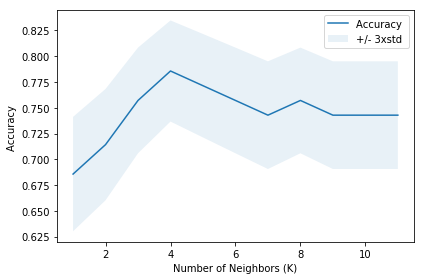</p>
<p>The best accuracy was with 0.785714285714 with k= 4</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="3"><blockquote>
<p>•<strong>Decision Tree</strong></p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="2">•</td>
<td>In [58]:</td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>from</strong> sklearn.tree <strong>import</strong>
DecisionTreeClassifier</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>from</strong> sklearn.externals.six <strong>import</strong>
StringIO</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>import</strong> matplotlib.image <strong>as</strong>
mpimg</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>from</strong> sklearn <strong>import</strong> tree</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="3"><blockquote>
<p>•</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p><em>#Modelling</em></p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>modeltree <strong>=</strong>
DecisionTreeClassifier(criterion<strong>=</strong>"entropy")</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p>modeltree<strong>.</strong>fit(X_train, y_train)</p>
</blockquote></td>
</tr>
</tbody>
</table>

> •

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p><em>#Prediction</em><br />
predTree <strong>=</strong> modeltree<strong>.</strong>predict(X_test)
print(predTree[0:5])<br />
print(y_test[0:5])</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>•</th>
<th><blockquote>
<p>names <strong>=</strong> Feature<strong>.</strong>columns</p>
</blockquote></th>
<th rowspan="16"><blockquote>
<p>In [24]:</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']</p>
</blockquote></th>
</tr>
<tr class="header">
<th>•</th>
<th><blockquote>
<p>['PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'COLLECTION']</p>
</blockquote></th>
</tr>
<tr class="odd">
<th rowspan="2">•</th>
<th>•</th>
</tr>
<tr class="header">
<th rowspan="2"><blockquote>
<p><strong>!</strong>pip install graphviz</p>
</blockquote></th>
</tr>
<tr class="odd">
<th rowspan="2">•</th>
</tr>
<tr class="header">
<th rowspan="2"><blockquote>
<p><strong>!</strong>pip install pydotplus</p>
</blockquote></th>
</tr>
<tr class="odd">
<th rowspan="2">•</th>
</tr>
<tr class="header">
<th rowspan="2"><blockquote>
<p><strong>import</strong> graphviz</p>
</blockquote></th>
</tr>
<tr class="odd">
<th rowspan="2">•</th>
</tr>
<tr class="header">
<th><blockquote>
<p><strong>import</strong> pydotplus</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th rowspan="2"><blockquote>
<p>dot_data <strong>=</strong> StringIO()</p>
</blockquote></th>
</tr>
<tr class="header">
<th>•</th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>filename <strong>=</strong> "tree.png"</p>
</blockquote></th>
</tr>
<tr class="header">
<th>•</th>
<th><blockquote>
<p>featureNames <strong>=</strong> Feature<strong>.</strong>columns</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>out<strong>=</strong>tree<strong>.</strong>export_graphviz(modeltree,feature_names<strong>=</strong>featureNames,</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> out_file**=**dot_data, class_names**=** np**.**unique(y_train),
> filled**=True**, special_characters**=True**,rotate**=False**)

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•<br />
•<br />
•<br />
•</p>
</blockquote>
<p>•</p></th>
<th><blockquote>
<p>graph <strong>=</strong>
pydotplus<strong>.</strong>graph_from_dot_data(dot_data<strong>.</strong>getvalue())<br />
graph <strong>=</strong>
pydotplus<strong>.</strong>graph_from_dot_data(dot_data<strong>.</strong>getvalue())<br />
graph<strong>.</strong>write_png(filename)<br />
img <strong>=</strong> mpimg<strong>.</strong>imread(filename)<br />
plt<strong>.</strong>figure(figsize<strong>=</strong>(100, 200))<br />
plt<strong>.</strong>imshow(img,interpolation<strong>=</strong>'nearest')<br />
Requirement already satisfied: graphviz in /opt/conda/envs/DSX-Python
35/lib/python3.5/site-packages (0.10.1)<br />
tensorflow 1.3.0 requires tensorflow-tensorboard&lt;0.2.0,&gt;=0.1.0,
which</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> is not installed.

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>•</th>
<th colspan="2"><blockquote>
<p>Requirement already satisfied: pydotplus in
/opt/conda/envs/DSX-Pytho</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td colspan="3"><blockquote>
<p>n35/lib/python3.5/site-packages (2.0.2)</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>Requirement already satisfied: pyparsing&gt;=2.0.1 in
/opt/conda/envs/DS</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="3"><blockquote>
<p>X-Python35/lib/python3.5/site-packages (from pydotplus) (2.2.0)</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>tensorflow 1.3.0 requires tensorflow-tensorboard&lt;0.2.0,&gt;=0.1.0,
which</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="3"><blockquote>
<p>is not installed.</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="2">•</td>
<td><blockquote>
<p>Out[24]:</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p>(2.2.0)</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>tensorflow 1.3.0 requires tensorflow-tensorboard&lt;0.2.0,&gt;=0.1.0,
which</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="3"><blockquote>
<p>is not installed.</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="2">•</td>
<td><blockquote>
<p>Out[24]:</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p>&lt;matplotlib.image.AxesImage at 0x7f90ccfe5b70&gt;</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="3"><blockquote>
<p>• 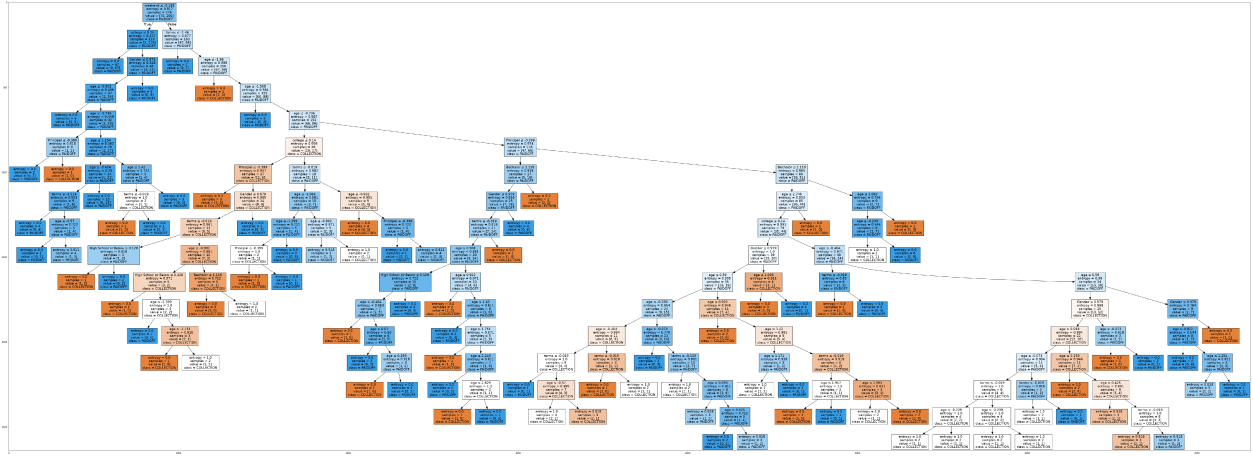</p>
<p>•<strong>Support Vector Machine</strong></p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="2">•</td>
<td><blockquote>
<p>In [25]:</p>
</blockquote></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p><strong>import</strong> pylab <strong>as</strong> pl<br />
<strong>import</strong> scipy.optimize <strong>as</strong> opt<br />
<strong>from</strong> sklearn <strong>import</strong> preprocessing
<strong>from</strong> sklearn <strong>import</strong> svm</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> •

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="3"><blockquote>
<p>•<br />
•<br />
•</p>
<p>•<br />
•</p>
</blockquote></th>
<th colspan="2"><blockquote>
<p><em>#Modelling</em><br />
clf <strong>=</strong>
svm<strong>.</strong>SVC(kernel<strong>=</strong>"sigmoid")<br />
clf<strong>.</strong>fit(X_train, y_train)</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>Out[25]:</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2"><blockquote>
<p>SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,<br />
decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigm</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> oid',

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>•</th>
<th colspan="2"><blockquote>
<p>max_iter=-1, probability=False, random_state=None,
shrinking=True,</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p>tol=0.001, verbose=False)</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="2">•</td>
<td><blockquote>
<p>In [26]:</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p><em>#Predict</em></p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>yhat <strong>=</strong> clf<strong>.</strong>predict(X_test)</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="2">•</td>
<td><blockquote>
<p>In [27]:</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p><em>#Evaluation</em></p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>from</strong> sklearn.metrics <strong>import</strong>
f1_score</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>f1_score(y_test,yhat, average<strong>=</strong>"weighted")</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="2">•</td>
<td><blockquote>
<p>Out[27]:</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>0.65761124121779857</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="3"><blockquote>
<p>•<strong>Logistic Regression</strong></p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="2">•</td>
<td><blockquote>
<p>In [28]:</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p><em>#Modelling</em></p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p><strong>from</strong> sklearn.linear_model <strong>import</strong>
LogisticRegression</p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p>LR <strong>=</strong> LogisticRegression(C<strong>=</strong>0.01,</p>
</blockquote></td>
</tr>
<tr class="even">
<td colspan="3"><blockquote>
<p>solver<strong>=</strong>"liblinear")<strong>.</strong>fit(X_train,y_train)</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="2">•</td>
<td><blockquote>
<p>In [29]:</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p><em>#Predict</em></p>
</blockquote></td>
</tr>
<tr class="odd">
<td>•</td>
<td colspan="2"><blockquote>
<p>yhat <strong>=</strong> LR<strong>.</strong>predict(X_test)</p>
</blockquote></td>
</tr>
<tr class="even">
<td>•</td>
<td colspan="2"><blockquote>
<p>yhat_prob <strong>=</strong>
LR<strong>.</strong>predict_proba(X_test)</p>
</blockquote></td>
</tr>
</tbody>
</table>

> •

<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
</colgroup>
<thead>
<tr class="header">
<th>•</th>
<th><blockquote>
<p><em>#Evaluation</em></p>
</blockquote></th>
<th rowspan="10">•</th>
<th rowspan="5">•</th>
<th rowspan="4"><blockquote>
<p>Out[29]:</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p><strong>from</strong> sklearn.metrics <strong>import</strong>
jaccard_similarity_score</p>
</blockquote></th>
</tr>
<tr class="header">
<th>•</th>
<th><blockquote>
<p>jaccard_similarity_score(y_test,yhat)</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>0.74285714285714288</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2"><blockquote>
<p>•<strong>Model Evaluation using Test set</strong></p>
</blockquote></th>
<th rowspan="3"><blockquote>
<p>In [30]:</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p><strong>from</strong> sklearn.metrics <strong>import</strong>
jaccard_similarity_score</p>
</blockquote></th>
<th rowspan="5">•</th>
</tr>
<tr class="header">
<th>•</th>
<th><blockquote>
<p><strong>from</strong> sklearn.metrics <strong>import</strong>
f1_score</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p><strong>from</strong> sklearn.metrics <strong>import</strong>
log_loss</p>
</blockquote></th>
<th rowspan="3"><blockquote>
<p>In [31]:</p>
</blockquote></th>
</tr>
<tr class="header">
<th>•</th>
<th><blockquote>
<p>First, download and load the test set:</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p><strong>!</strong>wget -O loan_test.csv https://s3-api.us-</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> geo.objectstorage.softlayer.net/cf-courses-  
> data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
>
> • --2019-06-02 16:49:50-- https://s3-api.us-geo.objectstorage.softlaye
> r.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv •
> Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.ob
> jectstorage.softlayer.net)... 67.228.254.193  
> • Connecting to s3-api.us-geo.objectstorage.softlayer.net
> (s3-api.us-ge o.objectstorage.softlayer.net)\|67.228.254.193\|:443...
> connected.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•<br />
•</p>
<p>•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p>HTTP request sent, awaiting response... 200 OK Length: 3642 (3.6K)
[text/csv]<br />
Saving to: ‘loan_test.csv’</p>
<p>100%[======================================&gt;] 3,642 --.-K/s i n
0s</p>
<p>2019-06-02 16:49:50 (472 MB/s) - ‘loan_test.csv’ saved
[3642/3642]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> •

<table>
<colgroup>
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 8%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="7"><strong>0</strong></th>
<th colspan="10"><blockquote>
<p>•<strong>Load Test set for evaluation</strong></p>
</blockquote></th>
<th rowspan="3"><blockquote>
<p>In [38]:</p>
</blockquote></th>
</tr>
<tr class="odd">
<th colspan="10">•</th>
</tr>
<tr class="header">
<th><blockquote>
<p>•</p>
</blockquote></th>
<th colspan="9"><blockquote>
<p>test_df <strong>=</strong>
pd<strong>.</strong>read_csv('loan_test.csv')</p>
</blockquote></th>
</tr>
<tr class="odd">
<th><blockquote>
<p>•</p>
</blockquote></th>
<th colspan="9"><blockquote>
<p>test_df<strong>.</strong>head()</p>
</blockquote></th>
<th rowspan="2">Out[38]:</th>
</tr>
<tr class="header">
<th colspan="10">•</th>
</tr>
<tr class="odd">
<th colspan="2"><blockquote>
<p><strong>Unna med: 0</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Unna med:</strong> <strong>0.1</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>loan_st</strong> <strong>atus</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Princi</strong> <strong>pal</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>ter</strong><br />
<strong>ms</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>effective</strong> <strong>_date</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>due_d</strong> <strong>ate</strong></p>
</blockquote></th>
<th><strong>a</strong><br />
<strong>ge</strong></th>
<th><blockquote>
<p><strong>educa</strong> <strong>tion</strong></p>
</blockquote></th>
<th><blockquote>
<p><strong>Gen</strong><br />
<strong>der</strong></p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2">1</th>
<th>1</th>
<th><blockquote>
<p>PAIDO FF</p>
</blockquote></th>
<th>1000</th>
<th>30</th>
<th>9/8/2016</th>
<th><blockquote>
<p>10/7/2 016</p>
</blockquote></th>
<th><blockquote>
<p>5<br />
0</p>
</blockquote></th>
<th><blockquote>
<p>Bechal or</p>
</blockquote></th>
<th><blockquote>
<p>fema<br />
le</p>
</blockquote></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><strong>1</strong></td>
<td colspan="2">5</td>
<td>5</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>300</td>
<td>7</td>
<td>9/9/2016</td>
<td><blockquote>
<p>9/15/2 016</p>
</blockquote></td>
<td><blockquote>
<p>3<br />
5</p>
</blockquote></td>
<td>Master or<br />
Above</td>
<td><blockquote>
<p>male</p>
</blockquote></td>
</tr>
<tr class="even">
<td><strong>2</strong></td>
<td colspan="2">21</td>
<td>21</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>30</td>
<td><blockquote>
<p>9/10/201 6</p>
</blockquote></td>
<td><blockquote>
<p>10/9/2 016</p>
</blockquote></td>
<td><blockquote>
<p>4<br />
3</p>
</blockquote></td>
<td>High<br />
School or<br />
Below</td>
<td><blockquote>
<p>fema<br />
le</p>
</blockquote></td>
</tr>
<tr class="odd">
<td><strong>3</strong></td>
<td colspan="2">24</td>
<td>24</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>1000</td>
<td>30</td>
<td><blockquote>
<p>9/10/201 6</p>
</blockquote></td>
<td><blockquote>
<p>10/9/2 016</p>
</blockquote></td>
<td><blockquote>
<p>2<br />
6</p>
</blockquote></td>
<td><blockquote>
<p>colleg e</p>
</blockquote></td>
<td><blockquote>
<p>male</p>
</blockquote></td>
</tr>
<tr class="even">
<td rowspan="5"><strong>4</strong></td>
<td colspan="2">35</td>
<td>35</td>
<td><blockquote>
<p>PAIDO FF</p>
</blockquote></td>
<td>800</td>
<td>15</td>
<td><blockquote>
<p>9/11/201 6</p>
</blockquote></td>
<td><blockquote>
<p>9/25/2 016</p>
</blockquote></td>
<td><blockquote>
<p>2<br />
9</p>
</blockquote></td>
<td><blockquote>
<p>Bechal or</p>
</blockquote></td>
<td><blockquote>
<p>male</p>
</blockquote></td>
</tr>
<tr class="odd">
<td colspan="10">•</td>
<td rowspan="4"><blockquote>
<p>In [50]:</p>
</blockquote></td>
</tr>
<tr class="even">
<td><blockquote>
<p>•</p>
</blockquote></td>
<td colspan="9"><blockquote>
<p><em># convert date time</em></p>
</blockquote></td>
</tr>
<tr class="odd">
<td><blockquote>
<p>•</p>
</blockquote></td>
<td colspan="9"><blockquote>
<p>test_df['due_date'] <strong>=</strong>
pd<strong>.</strong>to_datetime(test_df['due_date'])</p>
</blockquote></td>
</tr>
<tr class="even">
<td><blockquote>
<p>•</p>
</blockquote></td>
<td colspan="9"><blockquote>
<p>test_df['effective_date'] <strong>=</strong></p>
</blockquote></td>
</tr>
</tbody>
</table>

> pd**.**to_datetime(test_df\['effective_date'\])

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•</p>
<p>•<br />
•</p>
</blockquote>
<p>•</p></th>
<th><blockquote>
<p>test_df['dayofweek'] <strong>=</strong>
test_df['effective_date']<strong>.</strong>dt<strong>.</strong>dayofweek<br />
<em># evaulate weekend field</em><br />
test_df['weekend'] <strong>=</strong>
test_df['dayofweek']<strong>.</strong>apply(<strong>lambda</strong> x: 1
<strong>if</strong> (x<strong>&gt;</strong>3) <strong>else</strong>
0)<br />
<em># work out education level</em><br />
test_feature <strong>=</strong><br />
test_df[['Principal','terms','age','Gender','weekend']]<br />
test_feature <strong>=</strong></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> pd**.**concat(\[test_feature,pd**.**get_dummies(test_df\['education'\])\],
> axis**=**1)

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p>test_feature<strong>.</strong>drop(['Master or Above'], axis
<strong>=</strong> 1,inplace<strong>=True</strong>)
test_feature<strong>.</strong>head()<br />
<em># normalize the test data</em><br />
test_X <strong>=</strong></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> preprocessing**.**StandardScaler()**.**fit(test_feature)**.**transform(test_feat
> ure)

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="5"><blockquote>
<p>•<br />
•<br />
•<br />
•</p>
</blockquote>
<p>•</p>
<blockquote>
<p>•<br />
•</p>
</blockquote></th>
<th colspan="2"><blockquote>
<p>test_X[0:5]<br />
<em># and target result</em><br />
test_y <strong>=</strong> test_df['loan_status']<strong>.</strong>values
test_y[0:5]</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>Out[50]:</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2"><blockquote>
<p>array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=
object)</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>In [52]:</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2"><blockquote>
<p><em># normalize the test data</em><br />
TestX <strong>=</strong></p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> preprocessing**.**StandardScaler()**.**fit(test_feature)**.**transform(test_feat
> ure)

<table>
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th rowspan="5"><blockquote>
<p>•<br />
•<br />
•<br />
•</p>
</blockquote>
<p>•</p>
<blockquote>
<p>•<br />
•<br />
•</p>
</blockquote></th>
<th colspan="2"><blockquote>
<p>TestX[0:5]<br />
<em># and target result</em><br />
TestY <strong>=</strong> test_df['loan_status']<strong>.</strong>values
TestY[0:5]</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>Out[52]:</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2"><blockquote>
<p>array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=
object)</p>
</blockquote></th>
</tr>
<tr class="odd">
<th>•</th>
<th><blockquote>
<p>In [59]:</p>
</blockquote></th>
</tr>
<tr class="header">
<th colspan="2"><blockquote>
<p>knn_pred<strong>=</strong>neigh<strong>.</strong>predict(TestX)<br />
jc1<strong>=</strong>jaccard_similarity_score(TestY, knn_pred)
fs1<strong>=</strong>f1_score(TestY, knn_pred,
average<strong>=</strong>'weighted')</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> •

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•<br />
•<br />
•<br />
•<br />
•<br />
•<br />
•<br />
•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p>tree_pred<strong>=</strong>modeltree<strong>.</strong>predict(TestX)<br />
jc2<strong>=</strong>jaccard_similarity_score(TestY, tree_pred)
fs2<strong>=</strong>f1_score(TestY, tree_pred,
average<strong>=</strong>'weighted')</p>
<p>svm_pred<strong>=</strong>clf<strong>.</strong>predict(TestX)<br />
jc3<strong>=</strong>jaccard_similarity_score(TestY, svm_pred)
fs3<strong>=</strong>f1_score(TestY, svm_pred,
average<strong>=</strong>'weighted')</p>
<p>log_pred<strong>=</strong>LR<strong>.</strong>predict(TestX)<br />
proba<strong>=</strong>LR<strong>.</strong>predict_proba(TestX)<br />
jc4<strong>=</strong>jaccard_similarity_score(TestY, log_pred)
fs4<strong>=</strong>f1_score(TestY, log_pred,
average<strong>=</strong>'weighted')
ll4<strong>=</strong>log_loss(TestY, proba)</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> •

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p>list_jc <strong>=</strong> [jc1, jc2, jc3, jc4] list_fs
<strong>=</strong> [fs1, fs2, fs3, fs4] list_ll <strong>=</strong>
['NA', 'NA', 'NA', ll4]</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> •  
> •

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p><strong>import</strong> pandas <strong>as</strong> pd<br />
<em># fomulate the report format</em><br />
df <strong>=</strong> pd<strong>.</strong>DataFrame(list_jc,
index<strong>=</strong>['KNN','Decision</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>

> Tree','SVM','Logistic Regression'\])

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header">
<th><blockquote>
<p>•<br />
•<br />
•<br />
•<br />
•</p>
</blockquote></th>
<th><blockquote>
<p>df<strong>.</strong>columns <strong>=</strong> ['Jaccard']<br />
df<strong>.</strong>insert(loc<strong>=</strong>1,
column<strong>=</strong>'F1-score', value<strong>=</strong>list_fs)
df<strong>.</strong>insert(loc<strong>=</strong>2,
column<strong>=</strong>'LogLoss', value<strong>=</strong>list_ll)
df<strong>.</strong>columns<strong>.</strong>name <strong>=</strong>
'Algorithm'<br />
df</p>
</blockquote></th>
</tr>
</thead>
<tbody>
</tbody>
</table>
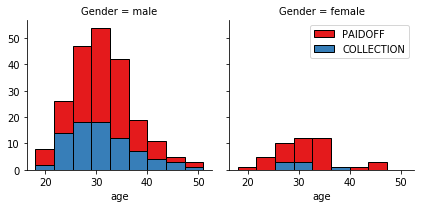
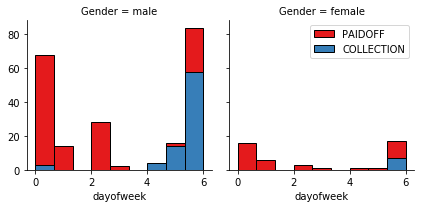